# Importing Necessary Libraries

In [2]:
#Import the pandas, numpy, matplotlib(pyplot) and seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn
import matplotlib
import os
print("pandas version : ",pd.__version__)
print("numpy version : ",np.__version__)
print("matplotlib version : ",matplotlib.__version__)
print("seaborn version : ",sns.__version__)

pandas version :  2.2.2
numpy version :  1.26.4
matplotlib version :  3.9.2
seaborn version :  0.13.2


# to read dataset

In [5]:
import warnings
warnings.filterwarnings("ignore")
loan=pd.read_csv('/Users/sinyc/Downloads/loan 2.csv')
# head
loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# tail


In [8]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# sanity Check of Data
# shape


In [11]:
loan.shape

(39717, 111)

# info

In [14]:

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# 1. Data cleaning

## 1.1 NULL value treatment

## 1.1 NULL value treatment
loan.info(verbose=True)

In [19]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

# 1.1.a Eliminate the columns where the NULL values are more than 60% of the rows
# We should find the columns which have NULL values more than 60% as it will not help in the analysis


In [22]:
null_value_perc = (loan.isnull().sum() / len(loan))*100 #This goes column wise and lets us know the percentage of null values in each column
cols_to_be_eliminated = null_value_perc[null_value_perc > 60] #This filters out the columns where the percentage of null values > 60
cols_to_be_eliminated.count()# This is the count of columns which will be eliminated
cols_to_be_eliminated.index # These are the columns which will be eliminated
perc_of_cols_eliminated = (cols_to_be_eliminated.count()/loan.columns.value_counts().count())*100 #Find out the percentage of columns eliminated this way
print("Number of columns to be eliminated (Which have Null values more than 60%) :",cols_to_be_eliminated.count())
print("Total number of columns in the initial dataset :",loan.columns.value_counts().count())
print("Percentage of columns to be removed : %.2f%%" % perc_of_cols_eliminated)
print("These are the columns which will be eliminated : ", cols_to_be_eliminated.index)

Number of columns to be eliminated (Which have Null values more than 60%) : 57
Total number of columns in the initial dataset : 111
Percentage of columns to be removed : 51.35%
These are the columns which will be eliminated :  Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',

In [24]:
loan.drop(columns=cols_to_be_eliminated.index, inplace=True) # Drop the columns idenified
loan.info(verbose=True) # Check the columns now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [26]:
loan.head() # Quick check on the data 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


# 1.2 Treating columns with only one value (Non unique columns)

# 1.2 Treating columns with only one value (Non unique columns)
# Below are the columns with non unique values 


In [30]:
warn.filterwarnings("ignore") #Ignore any warnings
cols_to_be_eliminated = loan.nunique()[loan.nunique() == 1].index # This gives the column names of those cols which have non unique values (Only one value)
print("There are the columns with non unique values (Where there is only one Unique value) which means that these cols are redundant for analysis")
print("The columns with such values are ", cols_to_be_eliminated)

There are the columns with non unique values (Where there is only one Unique value) which means that these cols are redundant for analysis
The columns with such values are  Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')


# Drop the values identified

In [33]:
#Drop the values identified
loan.drop(axis=1, columns=cols_to_be_eliminated, inplace=True)

In [35]:
print("The dataset now has %d columns upon removing the null columns and columns with non unique values " % loan.shape[1])
print("which are :", loan.columns)

The dataset now has 45 columns upon removing the null columns and columns with non unique values 
which are : Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


# 1.3 Further analysis on actions we can take on the columns

Upon analysing the resultant dataset upon removing the columns with null values and non unique values, we are left with 45 columns.
Out of these 45 columns we can
1.Eliminate the id columns as they are not required in the analysis. The analysis is not on the individual IDs. id and member_id columns can be removed
2.The funded_amnt and the funded_amnt_inv column look proportional to each other. Hence the funded_amnt_inv column can be removed
3.The url column is a text column which does not make any difference to the analysis hance it can be eliminated
4.The desc is the loan descrition which is a free text which does not help in analysis. The purpose column is better suited for analysis.
5.The title column also a free text field can be eliminated. The purpose column is better suited for analysis.
6.zip_code cannot categorize effectively and hence can be dropped from the analysis. addr_state is better suited.
7.Upon analysing the delinq_2yrs column using loan.delinq_2yrs.describe() function we see that the 1st to 3rd quartile values have the value 0, with teh max value as 11. This doesnt make it effective for analysis.
8.earliest_cr_line shows a date in the past which is not suited for analysis.
9.In the pub_rec column we see the 1st to 3rd quartile values have the value 0, with the max value as 4. Hence not suited for analysis.
10.The out_prncp and its corresponding column out_prncp_inv has most of the values as 0 hence not suited for analysis.
11.The total_pymnt_inv column corresponds to total_pymnt and both are not needed for analysis as it shows the total payment made and will not have any correspondence to defaulting on the loan hence removing both.
12.The 'total_rec_prncp', 'total_rec_int' sums up to total_pymnt hance they are not required.
13.recoveries will not help in analysis as they show the amount recovered and not the potential to default on the loan
14.'last_pymnt_d', 'last_pymnt_amnt' do not show the potential to default on the loan
15.last_credit_pull_d coloumn also does not help in analysis as it is a date field which cannot help analyse loan defaults
16.collection_recovery_fee also does not help in analysis as most of the values are 0.
17.total_rec_late_fee also does not help in analysis as most of the values are 0 found using loan.total_rec_late_fee.describe().
18.pub_rec_bankruptcies also does not help in analysis as most of the values are 0.
19.emp_title has 28820 values. Hence categorical analysis is not possible hence dropping the column
20.Between total_acc and open_acc it is better to consider only open_acc (The number of open credit lines) 
   as these variables correspond to each other

# The columns to be removed are



id
member_id
funded_amnt_inv
url
desc
title
zip_code
delinq_2yrs
earliest_cr_line
pub_rec
out_prncp_inv
out_prncp
total_pymnt_inv
total_rec_prncp
total_rec_int
recoveries
last_pymnt_d
last_pymnt_amnt
last_credit_pull_d
collection_recovery_fee
total_rec_late_fee
pub_rec_bankruptcies
emp_title
total_pymnt
total_acc


So in all 25 columns can be removed out of 45.

In [42]:
#Deleting the columns identified

loan.drop(axis=1, inplace=True, columns=['id','member_id','funded_amnt_inv','url','desc','title','zip_code','delinq_2yrs','earliest_cr_line','pub_rec','out_prncp_inv','out_prncp','total_pymnt_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','recoveries','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collection_recovery_fee','total_rec_late_fee','pub_rec_bankruptcies', 'emp_title','total_acc'])

print("The dataset now has %d columns upon removing the null columns and columns with non unique values " % loan.shape[1])
print("which are :", loan.columns)

The dataset now has 21 columns upon removing the null columns and columns with non unique values 
which are : Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'total_pymnt'],
      dtype='object')


In [44]:
loan.head() # Quick check on the datatset

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_pymnt
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,AZ,27.65,1,3,13648,83.70%,5863.155187
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,GA,1.00,5,3,1687,9.40%,1008.710000
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,IL,8.72,2,2,2956,98.50%,3005.666844
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,CA,20.00,1,10,5598,21%,12231.890000
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,OR,17.94,0,15,27783,53.90%,3513.330000


# 1.4 Eliminating any remaining NULL values by imputation or removal and further data treatment

# Finding Missing Values


In [48]:
# Checking the rows which have NULL values using the isna function and summing it up

In [50]:
loan.isna().sum()

loan_amnt                 0
funded_amnt               0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
inq_last_6mths            0
open_acc                  0
revol_bal                 0
revol_util               50
total_pymnt               0
dtype: int64

In [52]:
loan.head() # Quick check on the datatset

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_pymnt
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,AZ,27.65,1,3,13648,83.70%,5863.155187
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,GA,1.00,5,3,1687,9.40%,1008.710000
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,IL,8.72,2,2,2956,98.50%,3005.666844
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,CA,20.00,1,10,5598,21%,12231.890000
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,OR,17.94,0,15,27783,53.90%,3513.330000


It is a good idea to remove percentage % sign in the rate columns like Interest rate and
revolution credit utilization percentage for nuerical analysis

#Removing the percent values and converting to float

loan.int_rate = df.int_rate.str.replace('%','', regex=False).astype(float)
loan.revol_util = df.revol_util.str.replace('%','', regex=False).astype(float)

Quick observations:

1.The emp_length generally corresponds to the annual income.
2.We see that the emp_length field has 1075 empty values
3.Hence we would need to impute values
4.One approach would be to consider the annual_inc of those rows where emp_length is NULL.
5.Find the mode of the annual income. This will give us a benchmark income to find out theemp length.
6.We can take the mode of the emp_length where teh annual income is equal to what we got in the result earlier

In [58]:
annual_inc_mode = float(loan.annual_inc[loan["emp_length"].isna()].mode()) #Finding the most occouring income where emp_length is NULL. COnverting the numerical series to float
print("The most occouring income where emp_length is NULL is ", annual_inc_mode)
emp_length_mode = loan.emp_length[loan["annual_inc"] == annual_inc_mode].mode()[0]
print("The most common length of employment where the annual income equals the mode calculated is ",emp_length_mode)
print("This is the value we will impute the NULL values of emp_length with")
#annual_inc_mode

The most occouring income where emp_length is NULL is  36000.0
The most common length of employment where the annual income equals the mode calculated is  3 years
This is the value we will impute the NULL values of emp_length with


In [60]:
#Imputing the value obtained
loan.emp_length.fillna(emp_length_mode, inplace=True)

Focussing attention to the revol_util column

In [63]:
loan[loan.revol_util.isna()].head()

#We see thar revol_bal is mostly 0 where revol_util is NULL 

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,addr_state,dti,inq_last_6mths,open_acc,revol_bal,revol_util,total_pymnt
3565,8000,8000,36 months,19.42%,294.95,E,E3,3 years,RENT,30000.0,...,Nov-11,Fully Paid,debt_consolidation,IL,18.56,1,6,0,NaN,10706.010820
4714,6100,6100,36 months,14.27%,209.29,C,C2,3 years,MORTGAGE,23748.0,...,Nov-11,Charged Off,home_improvement,MO,23.95,0,2,0,NaN,1755.220000
4943,7200,7200,36 months,14.27%,247.03,C,C2,7 years,RENT,48000.0,...,Oct-11,Fully Paid,debt_consolidation,CA,15.28,0,2,0,NaN,7306.070000
11282,5000,5000,36 months,21.36%,189.31,F,F4,3 years,MORTGAGE,35000.0,...,Jul-11,Fully Paid,home_improvement,WA,21.91,2,2,0,NaN,6814.700817
12042,3000,3000,60 months,22.11%,83.05,G,G1,6 years,OWN,17652.0,...,Jul-11,Charged Off,other,MN,0.00,0,3,0,NaN,498.490000


In [65]:
loan.revol_util[loan.revol_bal == 0].mode()[0]
#Revol_util is mostly 0 where revol_bal is 0
#They wont add any value to the analysis and there are only 50 rows with null values and hence can be removed instead of imputing.


'0%'

In [67]:
#Dropping the values
loan = loan[loan.revol_util.notna()]

In [69]:
#Now check the NULL values
loan.isna().sum()

loan_amnt              0
funded_amnt            0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
dti                    0
inq_last_6mths         0
open_acc               0
revol_bal              0
revol_util             0
total_pymnt            0
dtype: int64

In [71]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 39667 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39667 non-null  int64  
 1   funded_amnt          39667 non-null  int64  
 2   term                 39667 non-null  object 
 3   int_rate             39667 non-null  object 
 4   installment          39667 non-null  float64
 5   grade                39667 non-null  object 
 6   sub_grade            39667 non-null  object 
 7   emp_length           39667 non-null  object 
 8   home_ownership       39667 non-null  object 
 9   annual_inc           39667 non-null  float64
 10  verification_status  39667 non-null  object 
 11  issue_d              39667 non-null  object 
 12  loan_status          39667 non-null  object 
 13  purpose              39667 non-null  object 
 14  addr_state           39667 non-null  object 
 15  dti                  39667 non-null  floa

Few observations :

1. loan_amnt and funded_amnt should be float instead of int.
2.emp_length needs to be an integer instead of a string
3.issue_d needs to be divided into month and day and Quarter (New columns will be needed)

In [75]:
#Convert Loan amount and funded amount to float

loan["loan_amnt"] = loan["loan_amnt"].astype(float)
loan["funded_amnt"] = loan["funded_amnt"].astype(float)

In [77]:
#Lets find the unique values for text columns
print("Term : ",loan["term"].unique())
print("Grade : ",loan["grade"].unique())
print("Sub Grade : ",loan["sub_grade"].unique())
print("Emp length : ",loan["emp_length"].unique())
print("Home Ownership : ",loan["home_ownership"].unique())
print("Verification Status : ",loan["verification_status"].unique())
print("Loan Status : ",loan["loan_status"].unique())
print("Purpose : ",loan["purpose"].unique())
print("Addr State : ",loan["addr_state"].unique())

Term :  [' 36 months' ' 60 months']
Grade :  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Sub Grade :  ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
Emp length :  ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
Home Ownership :  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
Verification Status :  ['Verified' 'Source Verified' 'Not Verified']
Loan Status :  ['Fully Paid' 'Charged Off' 'Current']
Purpose :  ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
Addr State :  ['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 'CO' 'KS' 'NV'
 'AK' 'MD' 'WV' 'VT' 'MI' 'DC' 'SD' 'NH' 'AR' 'NM' 'MT' 'HI' 'WY' 'O

In [79]:
#Lets find the unique values for certain float and int columns
print("Int Rate : ",loan["int_rate"].unique(), loan["int_rate"].value_counts())
print("Installment : ",loan["installment"].unique())
print("Annual Income : ",loan["annual_inc"].unique())
print("DTI : ",loan["dti"].unique())
print("Inquiry in last  months : ",loan["inq_last_6mths"].unique())
print("Open acc : ",loan["open_acc"].unique())
print("Revol Balance : ",loan["revol_bal"].unique())
print("Revol Util : ",loan["revol_util"].unique())
print("Total Payment", loan["total_pymnt"].unique())

Int Rate :  ['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.59%' '24.40%' '21.48%' '14.82%'
 '14.17%' '7.29%' '17.88%' '20.11%' '16.02%' '17.51%' '13.43%' '14.91%'
 '13.06%' '15.28%' '15.65%' '17.14%' '11.11%' '10.37%' '

# 1.5 Outlier treatment and bucketing

Further Observations :

To perform categorical analysis, we may have to bucket certain values to make them categorical for better analysis
Interest rate
Installmentm
Annual income
DTI
Revol balance
Total Acc
Total Payment
We need to find the quartile values and check and eliminate outliers and then estimate the buckets.

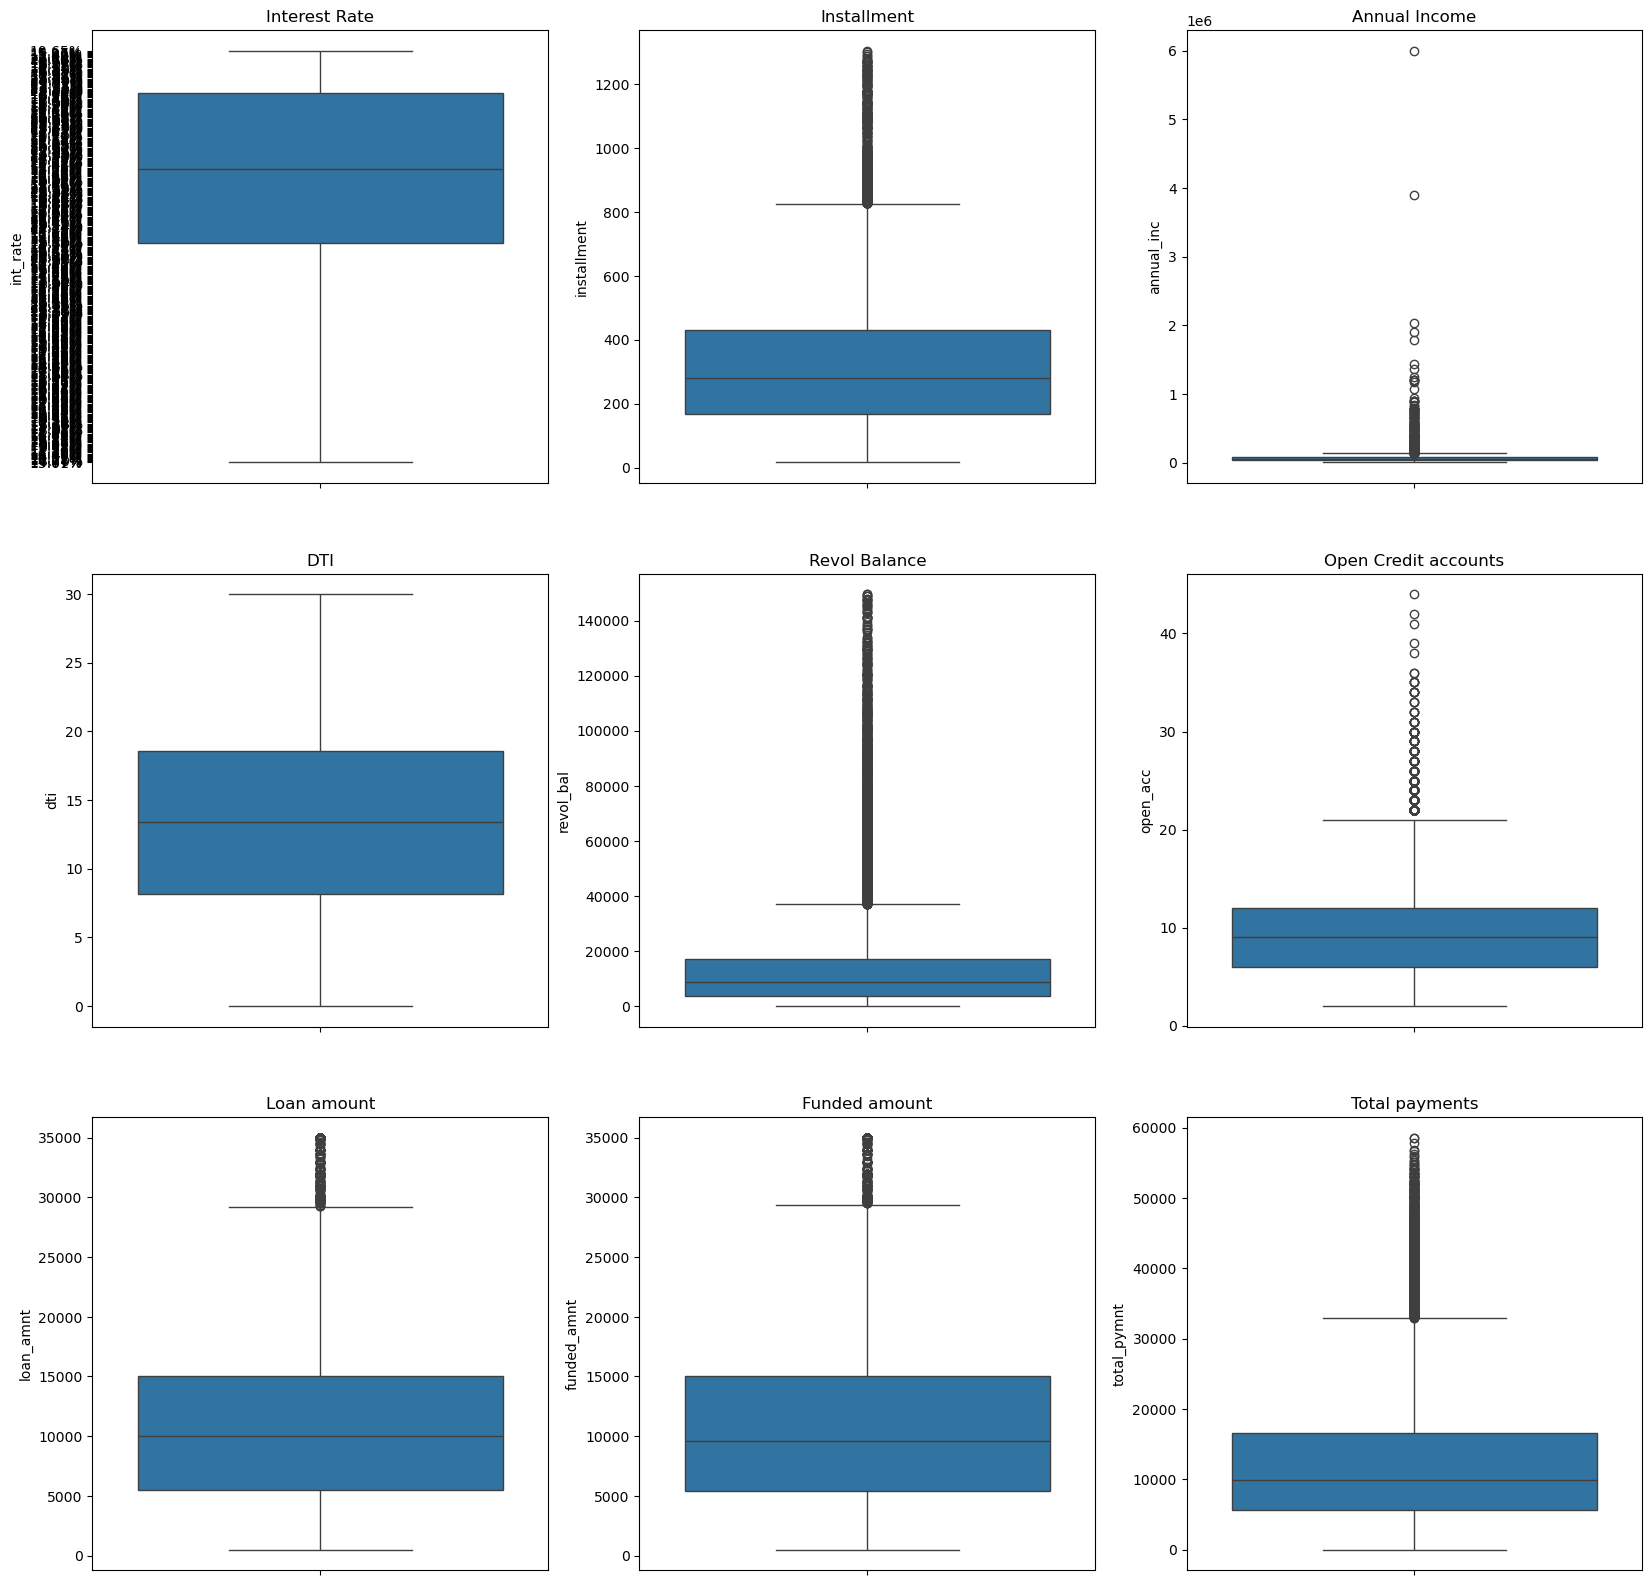

In [84]:

# First let us identify the outliers 
#Making subplots for different boxplots used for outlier analysis

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(data= loan.int_rate)
plt.title("Interest Rate")

plt.subplot(3,3,2)
sns.boxplot(data= loan.installment)
plt.title("Installment")

plt.subplot(3,3,3)
sns.boxplot(data= loan.annual_inc)
plt.title("Annual Income")

plt.subplot(3,3,4)
sns.boxplot(data= loan.dti)
plt.title("DTI")

plt.subplot(3,3,5)
sns.boxplot(data= loan.revol_bal)
plt.title("Revol Balance")

plt.subplot(3,3,6)
sns.boxplot(data= loan.open_acc)
plt.title("Open Credit accounts")

plt.subplot(3,3,7)
sns.boxplot(data= loan.loan_amnt)
plt.title("Loan amount")

plt.subplot(3,3,8)
sns.boxplot(data= loan.funded_amnt)
plt.title("Funded amount")


plt.subplot(3,3,9)
sns.boxplot(data= loan.total_pymnt)
plt.title("Total payments")

plt.show()
# To perform categorical analysis, we may have to bucket certain values to make them categorical for better analysis

Looking at the above graphs we see that the plots for the below columns have significant outliers which need treatment

Annual Income
Revol balance

In [88]:
#Performing outlier treatment on the Annual income field and Revol balance

iqr_mul = 1.5 #Make the IQR multiplier value 1.5. This means that the resultant should be within 1.5 times the IQR above or below the 25th percentile and 75th percentile

#Start with Annual Income
annual_inc_quart1 = loan["annual_inc"].quantile(0.25) # Take the 25th Percentile
annual_inc_quart2 = loan["annual_inc"].median() # Take the median
annual_inc_quart3 = loan["annual_inc"].quantile(0.75) # Take teh 75th percentile
annual_inc_iqr = annual_inc_quart3 - annual_inc_quart1 # Get the IQR by subtracting the 25th percentile from the 75th percentile

annual_inc_lower_bound = annual_inc_quart1 - annual_inc_iqr * iqr_mul
annual_inc_upper_bound = annual_inc_quart3 + annual_inc_iqr * iqr_mul

annual_inc_lower_limit = loan["annual_inc"] > annual_inc_lower_bound # Find out the values which are above the lower bound 
annual_inc_upper_bound = loan["annual_inc"] < annual_inc_upper_bound # Find out the values which are below the upper bound

annual_inc_range = annual_inc_lower_limit & annual_inc_upper_bound

loan = loan[annual_inc_range]


#Perform the same for Revol balance
revol_bal_quart1 = loan["revol_bal"].quantile(0.25) # Take the 25th Percentile
revol_bal_quart2 = loan["revol_bal"].median() # Take the median
revol_bal_quart3 = loan["revol_bal"].quantile(0.75) # Take teh 75th percentile

revol_bal_iqr = revol_bal_quart3 - revol_bal_quart1 # Get the IQR by subtracting the 25th percentile from the 75th percentile

revol_bal_lower_bound = revol_bal_quart1 - revol_bal_iqr * iqr_mul
revol_bal_upper_bound = revol_bal_quart3 + revol_bal_iqr * iqr_mul

revol_bal_lower_limit = loan["revol_bal"] > revol_bal_lower_bound # Find out the values which are above the lower bound
revol_bal_upper_bound = loan["revol_bal"] < revol_bal_upper_bound # Find out the values which are below the upper bound

revol_bal_range = revol_bal_lower_limit  & revol_bal_upper_bound

loan = loan[revol_bal_range]



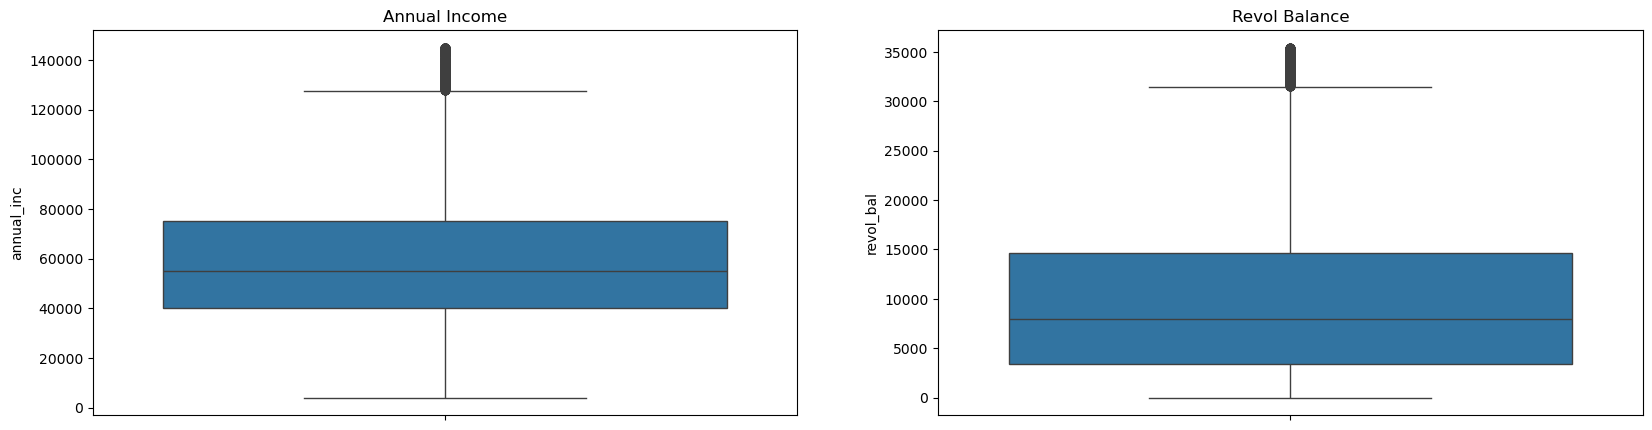

In [90]:
# Let us validate the box plots now

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(data= loan.annual_inc)
plt.title("Annual Income")

plt.subplot(1,2,2)
sns.boxplot(data= loan.revol_bal)
plt.title("Revol Balance")

plt.show()

# To perform categorical analysis, we may have to bucket certain values to make them categorical for better analysis

In [92]:
loan.info(verbose=True) #Quick check on the column parameters

<class 'pandas.core.frame.DataFrame'>
Index: 35707 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            35707 non-null  float64
 1   funded_amnt          35707 non-null  float64
 2   term                 35707 non-null  object 
 3   int_rate             35707 non-null  object 
 4   installment          35707 non-null  float64
 5   grade                35707 non-null  object 
 6   sub_grade            35707 non-null  object 
 7   emp_length           35707 non-null  object 
 8   home_ownership       35707 non-null  object 
 9   annual_inc           35707 non-null  float64
 10  verification_status  35707 non-null  object 
 11  issue_d              35707 non-null  object 
 12  loan_status          35707 non-null  object 
 13  purpose              35707 non-null  object 
 14  addr_state           35707 non-null  object 
 15  dti                  35707 non-null  floa

In [215]:
# The Issue date can be divided into day, month and year.
# Day, month and year and quarter coulmns can be derived

# Get the data to date time format
loan["issue_d"]=pd.to_datetime(loan.issue_d, format='%b-%y') # Format was like Dec-11 hence teh format attribute has been mentioned %b-%y where %b denotes month and %y denotes year

# Extract the Month and Year format

loan["issue_m"] = pd.DatetimeIndex(loan.issue_d).month
loan["issue_y"] = pd.DatetimeIndex(loan.issue_d).year

loan["issue_q"] = loan.issue_m.apply(lambda x: 'Q1' if x < 4 \
                                          else 'Q2' if x < 7 \
                                          else 'Q3' if x < 10\
                                          else 'Q4' ) 
# Q1 if month is less than 4 (April)
# Q2 if month is greater than or equals 4 (April) and less than or equals 6(June)
# Q3 if month is greater than or equals 7 (July) and less than or equals 9(Sept)
# Else it is Q4 

Observations for bucketing

1.Loan amount and Funded amount and Revol balance extend upto 35k. Total payment outliers extend upto 60k but is mostly upto 30k.
2.Interest rate extends upto 25% and DTI upto 30%
3.Annual income can go upto 150k
4.Number of open credit line accounts upto 45

emp_length can be made numerical

In [223]:
#Bucketing the loan amount and funded amount bucket using lambda function if else statements
import warnings
warnings.filterwarnings("ignore")

amount_bucketing_thresholds = [5000, 10000, 15000, 20000]

loan["loan_amnt_bucket"] = loan["loan_amnt"].apply(lambda x: '0 - 5k' if x < amount_bucketing_thresholds[0] \
                                                                     else ('5k - 10k' if x < amount_bucketing_thresholds[1] \
                                                                         else ('10k - 15k' if x < amount_bucketing_thresholds[2] \
                                                                               else ('15k - 20k' if x < amount_bucketing_thresholds[3] \
                                                                                     else '20k and above'))))

loan["funded_amnt_bucket"] = loan["funded_amnt"].apply(lambda x: '0 - 5k' if x < amount_bucketing_thresholds[0] \
                                                                     else ('5k - 10k' if x < amount_bucketing_thresholds[1] \
                                                                         else ('10k - 15k' if x < amount_bucketing_thresholds[2] \
                                                                               else ('15k - 20k' if x < amount_bucketing_thresholds[3] \
                                                                                     else '20k and above'))))


loan["total_pymnt_bucket"] = loan["total_pymnt"].apply(lambda x: '0 - 5k' if x < amount_bucketing_thresholds[0] \
                                                                     else ('5k - 10k' if x < amount_bucketing_thresholds[1] \
                                                                         else ('10k - 15k' if x < amount_bucketing_thresholds[2] \
                                                                               else ('15k - 20k' if x < amount_bucketing_thresholds[3] \

                                                                                    else '20k and above'))))

#Bucketing the Interest rates and DTIs using lambda function if else statements

rate_bucketing_thresholds = [5, 10, 15, 20]

loan["int_rate_bucket"] = loan["int_rate"].apply(lambda x: '0% - 5%' if x < rate_bucketing_thresholds[0] \
                                                                     else ('5% - 10%' if x < rate_bucketing_thresholds[1] \
                                                                         else ('10% - 15%' if x < rate_bucketing_thresholds[2] \
                                                                               else ('15% - 20%' if x < rate_bucketing_thresholds[3] \
                                                                                     else '20% and above'))))

loan["dti_bucket"] = loan["dti"].apply(lambda x: '0% - 5%' if x < rate_bucketing_thresholds[0] \
                                                                     else ('5% - 10%' if x < rate_bucketing_thresholds[1] \
                                                                         else ('10% - 15%' if x < rate_bucketing_thresholds[2] \
                                                                               else ('15% - 20%' if x < rate_bucketing_thresholds[3] \
                                                                                     else '20% and above'))))


#Bucketing the Annual income using lambda function if else statements

income_bucketing_thresholds = [40000, 60000, 80000, 100000]

loan["annual_inc_bucket"] = loan["annual_inc"].apply(lambda x: '0 - 40k' if x < income_bucketing_thresholds[0] \
                                                                     else ('40k - 60k' if x < income_bucketing_thresholds[1] \
                                                                         else ('60k - 80k' if x < income_bucketing_thresholds[2] \
                                                                               else ('80k - 100k' if x < income_bucketing_thresholds[3] \
                                                                                     else '100k and above'))))

TypeError: '<' not supported between instances of 'str' and 'int'

In [219]:
loan.emp_length.unique() #FInding out the unique values for emp_length before converting it to numbers

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7])

In [102]:
#Making emp_length numerical by applying lambda function using if else

loan["emp_length"] = loan["emp_length"].apply(lambda x: 0 if x == '< 1 year' \
                                              else(1 if x == '1 year'\
                                               else(2 if x == '2 years'\
                                                else(3 if x == '3 years'\
                                                 else(4 if x == '4 years'\
                                                  else(5 if x == '5 years'\
                                                   else(6 if x == '6 years'\
                                                    else(7 if x == '7 years'\
                                                     else(8 if x == '8 years'\
                                                      else(9 if x == '9 years'\
                                                        else 10))))))))))

In [104]:
loan.info(verbose=True) # Quick check on the column parameters

<class 'pandas.core.frame.DataFrame'>
Index: 35707 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            35707 non-null  float64       
 1   funded_amnt          35707 non-null  float64       
 2   term                 35707 non-null  object        
 3   int_rate             35707 non-null  object        
 4   installment          35707 non-null  float64       
 5   grade                35707 non-null  object        
 6   sub_grade            35707 non-null  object        
 7   emp_length           35707 non-null  int64         
 8   home_ownership       35707 non-null  object        
 9   annual_inc           35707 non-null  float64       
 10  verification_status  35707 non-null  object        
 11  issue_d              35707 non-null  datetime64[ns]
 12  loan_status          35707 non-null  object        
 13  purpose              35707 non-null 

In [106]:
loan # Quick check on the dataset

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,revol_bal,revol_util,total_pymnt,issue_m,issue_y,issue_q,loan_amnt_bucket,funded_amnt_bucket,total_pymnt_bucket
0,5000.0,5000.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,...,3,13648,83.70%,5863.155187,12,2011,Q4,5k - 10k,5k - 10k,5k - 10k
1,2500.0,2500.0,60 months,15.27%,59.83,C,C4,0,RENT,30000.0,...,3,1687,9.40%,1008.710000,12,2011,Q4,0 - 5k,0 - 5k,0 - 5k
2,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,...,2,2956,98.50%,3005.666844,12,2011,Q4,0 - 5k,0 - 5k,0 - 5k
3,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,...,10,5598,21%,12231.890000,12,2011,Q4,10k - 15k,10k - 15k,10k - 15k
4,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,...,15,27783,53.90%,3513.330000,12,2011,Q4,0 - 5k,0 - 5k,0 - 5k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39710,5000.0,5000.0,36 months,7.43%,155.38,A,A2,1,OWN,85000.0,...,7,216,0.60%,5593.626092,7,2007,Q3,5k - 10k,5k - 10k,5k - 10k
39712,2500.0,2500.0,36 months,8.07%,78.42,A,A4,4,MORTGAGE,110000.0,...,13,7274,13.10%,2822.969293,7,2007,Q3,0 - 5k,0 - 5k,0 - 5k
39713,8500.0,8500.0,36 months,10.28%,275.38,C,C1,3,RENT,18000.0,...,6,8847,26.90%,9913.491822,7,2007,Q3,5k - 10k,5k - 10k,5k - 10k
39714,5000.0,5000.0,36 months,8.07%,156.84,A,A4,0,MORTGAGE,100000.0,...,11,9698,19.40%,5272.161128,7,2007,Q3,5k - 10k,5k - 10k,5k - 10k


In [108]:
loan # Quick check on the dataset

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc,revol_bal,revol_util,total_pymnt,issue_m,issue_y,issue_q,loan_amnt_bucket,funded_amnt_bucket,total_pymnt_bucket
0,5000.0,5000.0,36 months,10.65%,162.87,B,B2,10,RENT,24000.0,...,3,13648,83.70%,5863.155187,12,2011,Q4,5k - 10k,5k - 10k,5k - 10k
1,2500.0,2500.0,60 months,15.27%,59.83,C,C4,0,RENT,30000.0,...,3,1687,9.40%,1008.710000,12,2011,Q4,0 - 5k,0 - 5k,0 - 5k
2,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,12252.0,...,2,2956,98.50%,3005.666844,12,2011,Q4,0 - 5k,0 - 5k,0 - 5k
3,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,49200.0,...,10,5598,21%,12231.890000,12,2011,Q4,10k - 15k,10k - 15k,10k - 15k
4,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1,RENT,80000.0,...,15,27783,53.90%,3513.330000,12,2011,Q4,0 - 5k,0 - 5k,0 - 5k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39710,5000.0,5000.0,36 months,7.43%,155.38,A,A2,1,OWN,85000.0,...,7,216,0.60%,5593.626092,7,2007,Q3,5k - 10k,5k - 10k,5k - 10k
39712,2500.0,2500.0,36 months,8.07%,78.42,A,A4,4,MORTGAGE,110000.0,...,13,7274,13.10%,2822.969293,7,2007,Q3,0 - 5k,0 - 5k,0 - 5k
39713,8500.0,8500.0,36 months,10.28%,275.38,C,C1,3,RENT,18000.0,...,6,8847,26.90%,9913.491822,7,2007,Q3,5k - 10k,5k - 10k,5k - 10k
39714,5000.0,5000.0,36 months,8.07%,156.84,A,A4,0,MORTGAGE,100000.0,...,11,9698,19.40%,5272.161128,7,2007,Q3,5k - 10k,5k - 10k,5k - 10k


In [110]:
#Getting summary statistics

loan.describe()


,loan_amnt,funded_amnt,installment,emp_length,annual_inc,issue_d,dti,inq_last_6mths,open_acc,revol_bal,total_pymnt,issue_m,issue_y
count,35707.000000,35707.000000,35707.000000,35707.000000,35707.000000,35707,35707.000000,35707.000000,35707.000000,35707.000000,35707.000000,35707.000000,35707.000000
mean,10603.589632,10369.051587,307.485918,4.798667,59479.613787,2010-11-05 15:12:11.049934080,13.277368,0.865349,9.041280,9955.160193,11454.593529,7.167530,2010.333828
min,500.000000,500.000000,15.690000,0.000000,4000.000000,2007-06-01 00:00:00,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,2007.000000
25%,5000.000000,5000.000000,162.270000,2.000000,39996.000000,2010-05-01 00:00:00,8.160000,0.000000,6.000000,3376.000000,5427.287004,4.000000,2010.000000
50%,9200.000000,9000.000000,268.830000,4.000000,55000.000000,2011-02-01 00:00:00,13.370000,1.000000,8.000000,7986.000000,9397.023804,7.000000,2011.000000
75%,14787.500000,14087.500000,404.240000,8.000000,75000.000000,2011-08-01 00:00:00,18.550000,1.000000,11.000000,14624.500000,15508.789465,10.000000,2011.000000
max,35000.000000,35000.000000,1288.100000,10.000000,145008.000000,2011-12-01 00:00:00,29.990000,8.000000,42.000000,35430.000000,58563.679930,12.000000,2011.000000
std,6956.015510,6708.224957,193.634714,3.491576,27146.598524,NaN,6.663880,1.063605,4.289218,8187.293476,8367.371037,3.402382,0.872554


# Summary analysis of categorical variables. Using bar plots and sub plots

KeyError: 'annual_inc_bucket'

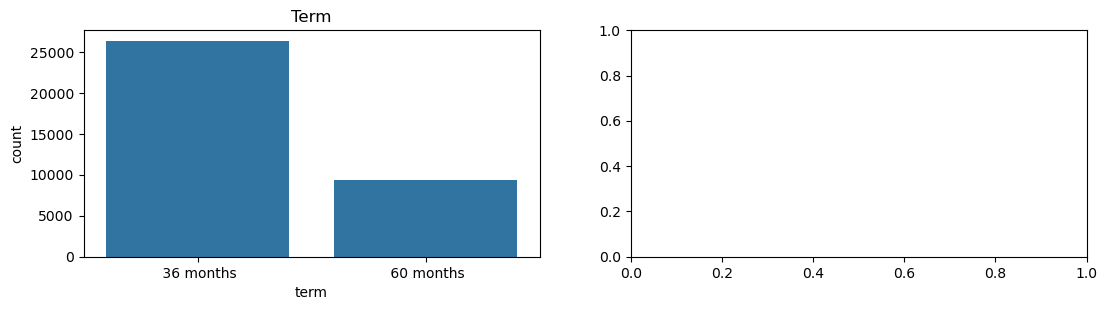

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(20, 10))

# Subplot 1: Term
plt.subplot(3, 3, 1)
sns.countplot(data=loan, x="term", order=loan["term"].value_counts().index)
plt.title("Term")

# Subplot 2: Annual Income
plt.subplot(3, 3, 2)
sns.countplot(data=loan, x="annual_inc_bucket", order=loan["annual_inc_bucket"].value_counts().index)
plt.title("Annual Income")

# Subplot 3: Loan Amount
plt.subplot(3, 3, 3)
sns.countplot(data=loan, x="loan_amnt_bucket", order=loan["loan_amnt_bucket"].value_counts().index)
plt.title("Loan Amount")

# Subplot 4: Loan Purpose
plt.subplot(3, 3, 4)
sns.countplot(data=loan, x="purpose", order=loan["purpose"].value_counts().index)
plt.title("Loan Purpose")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 35707 and the vector passed to `x` has length 2.

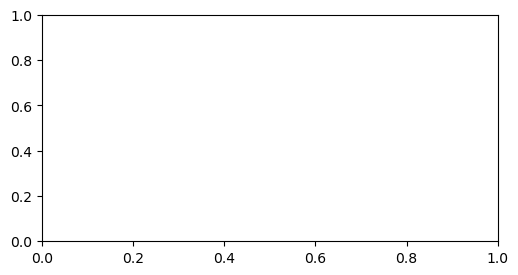

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))

plt.subplot(3,3,1)
sns.barplot(data=loan, x=loan["term"].unique(), y= loan["term"].value_counts().values)
plt.title("Term")


plt.subplot(3,3,2)
sns.barplot(data=loan, x=loan["annual_inc_bucket"].unique(), y= loan["annual_inc_bucket"].value_counts().values)
plt.title("Annual Income")


plt.subplot(3,3,3)
sns.barplot(data=loan, x=loan["loan_amnt_bucket"].unique(), y= loan["loan_amnt_bucket"].value_counts().values)
plt.title("Loan amount")

plt.subplot(3,3,4)
sns.barplot(data =loan, x=loan["purpose"].unique(), y= loan["purpose"].value_counts().values)
plt.title("Loan purpose")

plt.subplot(3,3,5)
sns.barplot(data=loan, x=loan["int_rate_bucket"].unique(), y= loan["int_rate_bucket"].value_counts().values)
plt.title("Interest rate")


plt.subplot(3,3,6)
sns.barplot(data=loan, x=loan["dti_bucket"].unique(), y= loan["dti_bucket"].value_counts().values)
plt.title("DTI")


plt.subplot(3,3,7)
sns.barplot(data=loan, x=loan["issue_q"].unique(), y= loan["issue_q"].value_counts().values)
plt.title("Quarter")


plt.subplot(3,3,8)
sns.barplot(data=loan, x=loan["addr_state"].unique(), y= loan["addr_state"].value_counts().values)
plt.title("State")


plt.subplot(3,3,9)
sns.barplot(data=loan, x= loan["home_ownership"].unique(), y= loan["home_ownership"].value_counts().values)
plt.title("Home Ownership")

plt.show()

2. Analysis of the fields

2.1 Correlation Analysis of all fields

ValueError: could not convert string to float: ' 36 months'

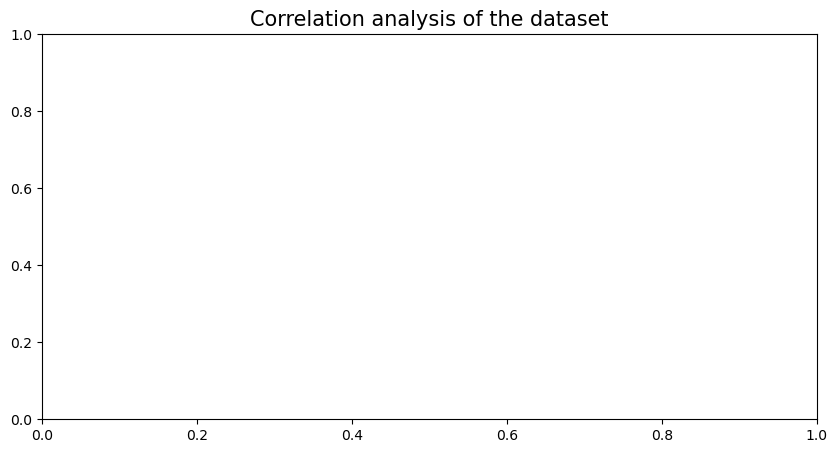

In [117]:
# Performing a correlation analysis to get initial insights
plt.figure(figsize=(10,5))
plt.title("Correlation analysis of the dataset", fontsize=15)
loan_corr = loan.corr()
corr_plot= sns.heatmap(loan_corr, annot=True)
corr_plot.set_xticklabels(["Loan Amount","Funded Amount", "Interest Rate","Installment","Employment Length",
                           "Annual Income","DTI","Inquiries","Open Accounts","Revolving balance","Revolving Credit Util",
                           "Total Payment","Month Issued", "Year Issued"])
corr_plot.set_yticklabels(["Loan Amount","Funded Amount", "Interest Rate","Installment","Employment Length",
                           "Annual Income","DTI","Inquiries","Open Accounts","Revolving balance","Revolving Credit Util",
                           "Total Payment","Month Issued", "Year Issued"])
plt.show()

Conclusions on Correlation analysis:

1.The DTI column has teh lowest correlation with any column
2.The DTI column has a negative correlation with Annual income
3.Total amount, loan amount, installment and total payment, have very syrong correlations with each other. Due to the strong correlation between these variables we can analyse just the Loan amount.
4.Month and year issued do not have any correlation with any variable, but it is not expected to have correlation as it is a measure of time. Any correlation which happens would be by chance.
5.Inquiries column also does not have any strong correlation with any other variable.

2.2. Analysis on the field Term

2.2.a. Univariate Analysis

In [123]:
#Plotting a bar chart on only the loans which are charged off by loan term
plt.figure(figsize=(10,5))
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan["term"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["term"].value_counts().values)
plt.xlabel('Term', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Univariate Analysis of Term", fontsize=15)
plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 5087 and the vector passed to `x` has length 2.

<Figure size 1000x500 with 0 Axes>

# Conclusion: We see that the 36 month loans get Charged off more



# 2.2.b. Bivariate analysis

We need to see the comparison of the different loan status across the Terms

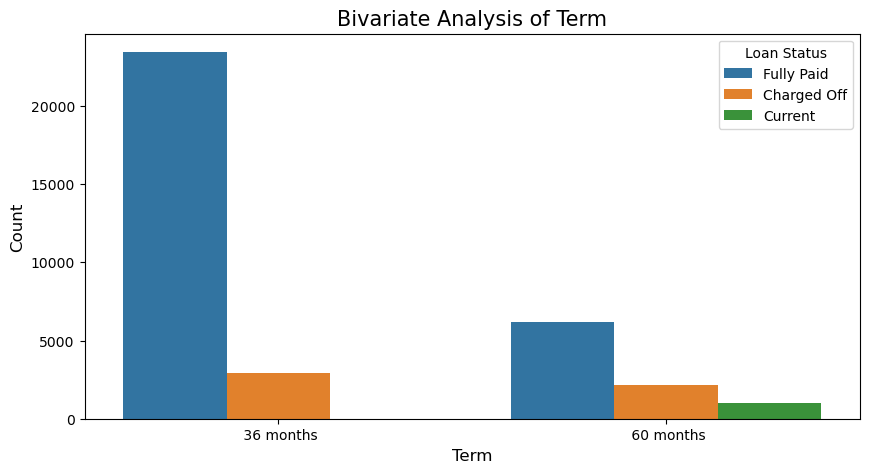

In [128]:
#Plot the count plot over the different loan terms on the X axis showing the difference between different loan statuses
plt.figure(figsize=(10,5))
term_plot=sns.countplot( data=loan, hue= "loan_status", x= "term")
plt.xlabel('Term', fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Bivariate Analysis of Term", fontsize=15)
term_plot.legend(title="Loan Status")
plt.show()

Conclusion:

1.We still see that the 36 month loans get Charged off more.
2.But we also see that the 36 month loans get paid much more. So the above statement would be incorrect.
3.The propotion of 60 month loans getting defaulted is higher.
4.Bivariate analysis made the picture clearer over here.

2.3. Analysis of Grade

2.3.a Univariate Analysis

In [134]:
#Plotting a bar chart on only the loans which are charged off by  grade
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan["grade"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["grade"].value_counts().values)
plt.title("Univariate Analysis of Grade", fontsize=15)
plt.xlabel("Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 5087 and the vector passed to `x` has length 7.

<Figure size 1000x500 with 0 Axes>

Conclusion : Category B gets charged off the most

In [137]:
1.We see that quantitatively, B gets charged off the most but also the number of loans taken with grade B is the highest.
2.So this conclusion is incorrect.
3.Proportion wise loans with grade D gets charged off the most

SyntaxError: invalid decimal literal (1535794053.py, line 1)

2.4 Analysis of subgrade

2.4.a Univariate Analysis

In [205]:
#Plotting a bar chart on only the loans which are charged off by Sub grade

plt.figure(figsize=(1000,500))
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan["sub_grade"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["sub_grade"].value_counts().values)
plt.title("Univariate Analysis of Sub Grade", fontsize=15)
plt.xlabel("Sub Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 5087 and the vector passed to `x` has length 35.

Error in callback <function _draw_all_if_interactive at 0x12a659620> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 100000x50000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 100000x50000 with 0 Axes>

Conclusion : The B2 Subgrade shows higher numbers of defaulting

2.4.b Bivariate Analysis

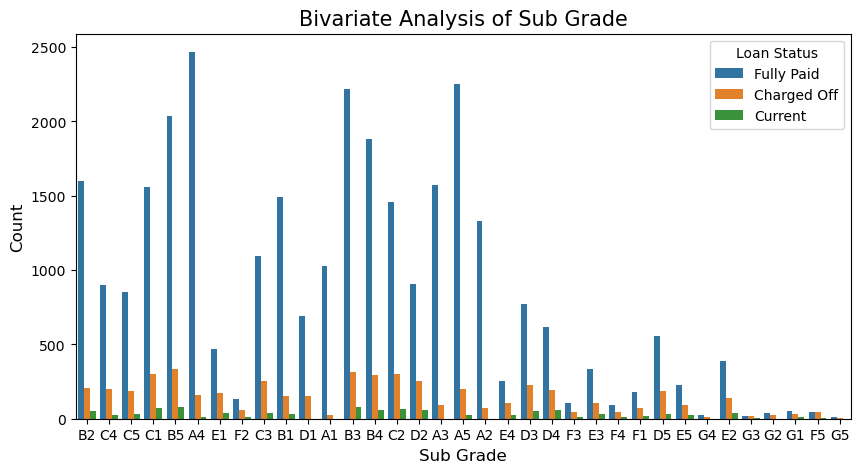

In [145]:
#Plot the count plot over the different sub grades on the X axis showing the difference between different loan statuses

plt.figure(figsize=(10,5))
sub_grade_plot = sns.countplot(data=loan, hue=loan["loan_status"], x=loan["sub_grade"])
plt.title("Bivariate Analysis of Sub Grade", fontsize=15)
plt.xlabel("Sub Grade", fontsize=12)
plt.ylabel("Count", fontsize=12)
sub_grade_plot.legend(title="Loan Status")
plt.show()

Conclusion:



1.We see that quantitatively, B5 gets charged off the most but also the number of loans taken with grade B5 are also very high. This is slightly different from the result from univariate analysis
2.So this conclusion is incorrect.
3.Proportion wise loans with grade D3 and D4 which get charged off the most


2.5 Analysis of the Interest rate column

2.5.a Univariate Analysis

In [203]:
#Plotting a bar chart on only the loans which are charged off by Interest Rates
plt.figure(figsize=(10,5))
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan["int_rate_bucket"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["int_rate_bucket"].value_counts().values)
plt.title("Univariate Analysis of Interest rate", fontsize=15)
plt.xlabel("Interest Rate", fontsize=12)
plt.ylabel("Count", fontsize=10)
plt.show()

KeyError: 'int_rate_bucket'

<Figure size 1000x500 with 0 Axes>

Conclusion : As per observation loans in the 10 - 15% category are defaulted most



2.5.b Bivariate Analysis

In [157]:
#Plot the count plot over the different Interest rates on the X axis showing the difference between different loan statuses
plt.figure(figsize=(10,5))
int_rate_plot = sns.countplot(data=loan, hue=loan["loan_status"], x=loan["int_rate_bucket"])
plt.title("Bivariate Analysis of Interest Rate", fontsize=15)
plt.xlabel("Interest rate", fontsize=12)
plt.ylabel("Count", fontsize=12)
int_rate_plot.legend(title="Loan Status")
plt.show()

KeyError: 'int_rate_bucket'

<Figure size 1000x500 with 0 Axes>

But as per Bivariate analysis


1.Quantitatively loans with 10 - 15% are defaulted more but the number of loans in that category are issued and paid off the most too.
2.Proportion wise we see that the higher the interest rate higher is the chance to default.

2.6 Analysis of DTI

2.6.a Univariate analysis

In [163]:
#Plotting a bar chart on only the loans which are charged off by DTI
plt.figure(figsize=(10,5))
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan["dti_bucket"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["dti_bucket"].value_counts().values)
plt.title("Univariate Analysis of DTI", fontsize=15)
plt.xlabel("DTI", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

KeyError: 'dti_bucket'

<Figure size 1000x500 with 0 Axes>

Conclusion: Numerically the highest DTI shows numbers but not very strongly.

2.6.b Bivariate analysis

In [167]:
 #Plot the count plot over the different DTIs on the X axis showing the difference between different loan statuses

plt.figure(figsize=(10,5))
dti_plot = sns.countplot(data=loan, hue=loan["loan_status"], x=loan["int_rate_bucket"])
plt.title("Bivariate Analysis of Interest Rate", fontsize=15)
plt.xlabel("Interest rate", fontsize=12)
plt.ylabel("Count", fontsize=12)
dti_plot.legend(title="Loan Status")
plt.show()

KeyError: 'int_rate_bucket'

<Figure size 1000x500 with 0 Axes>

Conclusion :

1.20% and above DTI shows the highest proportion of defaulting. No correlation observed though.
2.Cannot draw any strong conclusion

2.7 Analysis of the Annual income and verification status

2.7.a Univariate analysis

KeyError: 'annual_inc_bucket'

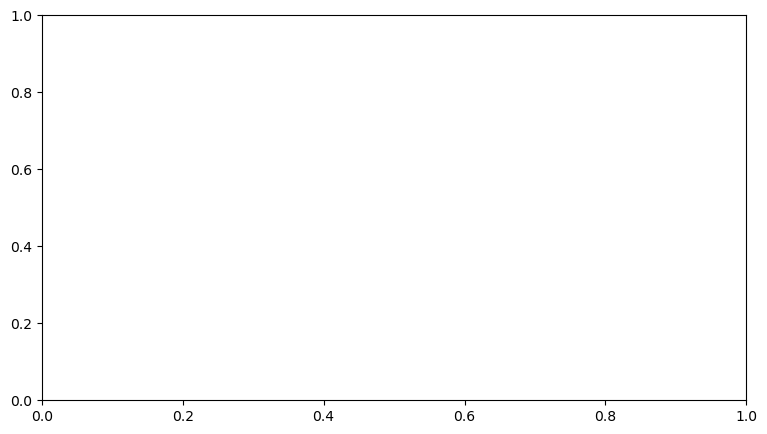

In [179]:
#Plotting subplots with bar charts on only the loans which are charged off by annual income and verification status
plt.figure(figsize=(20,5))

plt.subplot(1,2,1) # By annual income
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan["annual_inc_bucket"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["annual_inc_bucket"].value_counts().values)
plt.title("Univariate Analysis of Annual Income", fontsize=15)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(1,2,2) #By verification status
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan["verification_status"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["verification_status"].value_counts().values)
plt.title("Univariate Analysis of Verification Status", fontsize=15)
plt.xlabel("Verification status", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

Conclusion :

 On first glance at the univariate analysis we see that the lower incomes below 60k tend to default on their loans. Also people with verified incomes tend to default.



2.7.b. Bivariate analysis

KeyError: 'annual_inc_bucket'

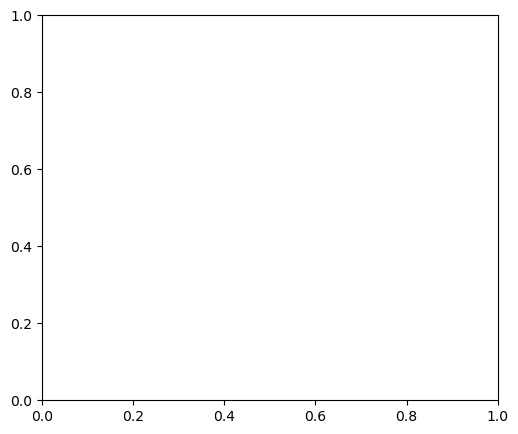

In [181]:
#Plot the count plot on subplots over the different annual income buckets, verification statues and on the X axis showing the difference between different loan statuses
#and also a plot on annual income vs verification status.
plt.figure(figsize=(20,5))

plt.subplot(1,3,1) # By annual income
annual_inc_plot =sns.countplot(data=loan, hue=loan["loan_status"], x=loan["annual_inc_bucket"])
plt.title("Bivariate Analysis of Annual Income", fontsize=15)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Count", fontsize=12)
annual_inc_plot.legend(title="Loan Status")

plt.subplot(1,3,2) # By verification status
verification_status_plot = sns.countplot(data=loan, hue=loan["loan_status"], x=loan["verification_status"])
plt.title("Bivariate Analysis of Verification Status", fontsize=15)
plt.xlabel("Verification status", fontsize=12)
plt.ylabel("Count", fontsize=12)
verification_status_plot.legend(title="Loan Status")

plt.subplot(1,3,3) # Annual income vs verification status
income_vs_status = sns.countplot(data=loan, hue=loan["verification_status"], x=loan["annual_inc_bucket"])
plt.title("Bivariate Analysis of Annual Income vs Verification Status", fontsize=15)
plt.xlabel("Annual Income", fontsize=12)
plt.ylabel("Count", fontsize=12)
income_vs_status.legend(title="Verification Status")

plt.show()

Conclusion:

1.We see higher chances of defaulting in the 0 - 40k bracket, closely followed by 60 - 80k bracket
2.Verification of income doesnt seem to play a major part here. We see non verified incomes having a higher rate of loan repayment. (Most of the non verified incomes are in the below 80k bracket)
3.We see higher verification of income happening for higher incomes 80-100k and 100k and above
4.A strong conclusion cannot be drawn here.

Recommendation : Make the verification process more stringent.

2.8. Analysis of the Loan amount field


2.8.a. Univariate analysis

In [183]:
#Plotting a bar chart on only the loans which are charged off by loan amount buckets
plt.figure(figsize=(10,10))
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan["loan_amnt_bucket"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["loan_amnt_bucket"].value_counts().values)
plt.title("Univariate Analysis of Loan amount", fontsize=15)
plt.xlabel("Loan amount", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 5087 and the vector passed to `x` has length 5.

<Figure size 1000x1000 with 0 Axes>

Conclusion : 5k to 10k loans get charged off the most

2.8.b. Bivariate analysis

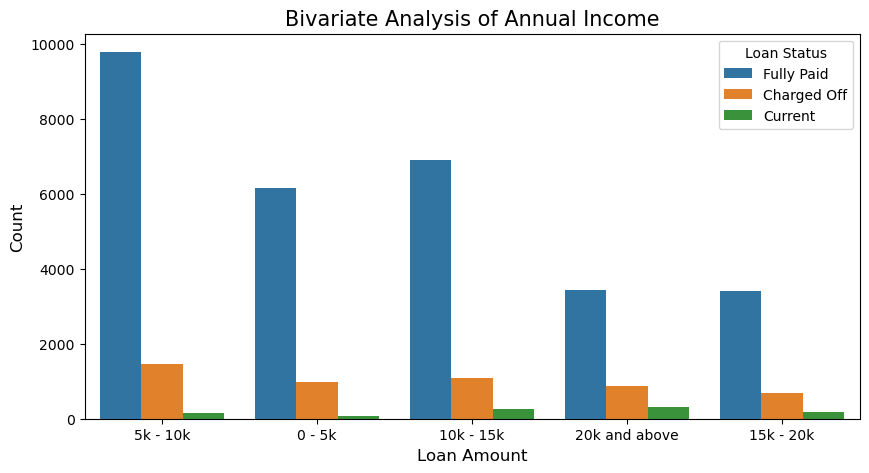

In [192]:
#Plot the count plot over the different loan amount buckets on the X axis showing the difference between different loan statuses
plt.figure(figsize=(10,5))
loan_amnt_plot =sns.countplot(data=loan, hue=loan["loan_status"], x=loan["loan_amnt_bucket"])
plt.title("Bivariate Analysis of Annual Income", fontsize=15)
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Count", fontsize=12)
loan_amnt_plot.legend(title="Loan Status")
plt.show()

In [ ]:
Conclusion:

5k - 10k loans are more in number. Hence the number of charged off loans are seemingly high.
Proportion wise loans of 20k and above and 15 - 20k are charged off the most.

Higher loan amounts are charged off more. Hence proper vetting and background checks are necessary for higher loans.



In [ ]:
2.9 Analysis of Purpose of the loan

In [ ]:

2.9.a Univariate analysis

In [17]:
#Plotting a bar chart on only the loans which are charged off by loan purpose
plt.figure(figsize=(20,10))
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan["purpose"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["purpose"].value_counts().values)
plt.title("Univariate Analysis of Loan purpose", fontsize=15)
plt.xlabel("Loan purpose", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

NameError: name 'loan' is not defined

<Figure size 2000x1000 with 0 Axes>

In [ ]:
Conclusion: Credit card loans are charged off the most in number

In [ ]:
2.9.b. Bivariate analysis

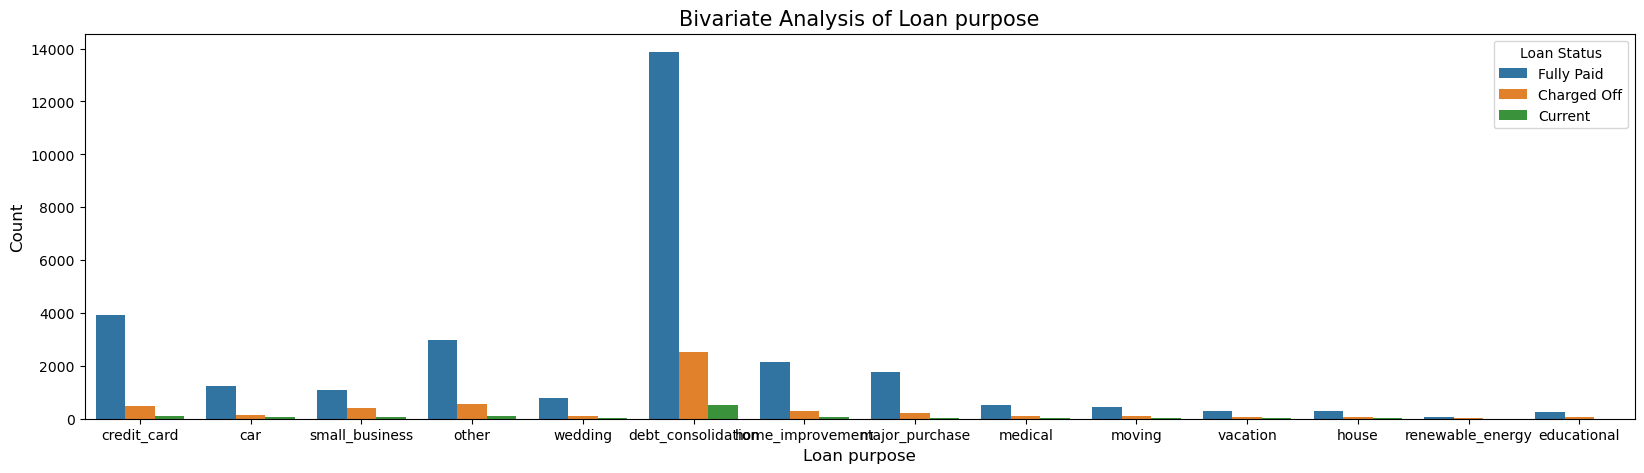

In [196]:
#Plot the count plot over the different loan purposes on the X axis showing the difference between different loan statuses

plt.figure(figsize=(20,5))
loan_purpose_plot =sns.countplot(data=loan, hue=loan["loan_status"], x=loan["purpose"])
plt.title("Bivariate Analysis of Loan purpose", fontsize=15)
plt.xlabel("Loan purpose", fontsize=12)
plt.ylabel("Count", fontsize=12)
loan_purpose_plot.legend(title="Loan Status")
plt.show()

In [ ]:
Conclusion :

Debt consolidation loans are numerically superior in getting charged off and paid off.
Unable to find which category has the highest proportion of defaulting.
One approach would be to plot the percentage of defaulters for each purpose, 
by dividing the total charged off loans by total loans grouped by the purpose

In [ ]:
2.9.c. Analysis on Derived metrics

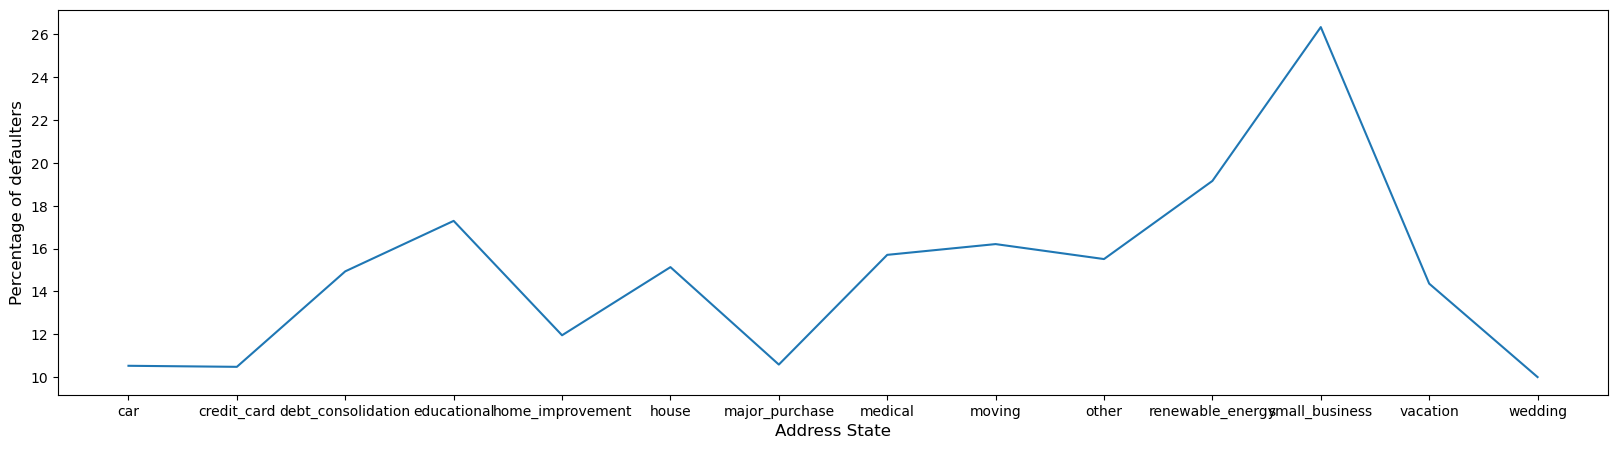

In [198]:
#We find the number of charnged off loans divided by the tota number of loans grouping them by Loan purpose to check which Purpose has teh highest percentage of defaulters
purposewise_defaulter_perc = (loan[loan["loan_status"] == "Charged Off"].groupby("purpose").size()/loan.groupby("purpose").size())*100
plt.figure(figsize=(20,5))
sns.lineplot(data=purposewise_defaulter_perc)
plt.xlabel("Address State", fontsize=12)
plt.ylabel("Percentage of defaulters", fontsize=12)
plt.show()

In [ ]:
Conlusion :
We saw in the bivariate analysis that Debt consolidation is higher in number, but the total loans were also high.

We see upon checking the percentage of defaulters that small business loans are more likely to default, followed by renewable energy projects.

In [ ]:
Recommendation :
Stringent checks on business feasibility must be performed. Detailed RoI analysis should be perfomed.

In [ ]:
2.10. Analysis on employment length

In [ ]:
2.10.a. Univariate analysis

In [185]:
#Plotting a bar chart on only the loans which are charged off by the employment length
plt.figure(figsize=(10,5))
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan["emp_length"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["emp_length"].value_counts().values)
plt.title("Univariate Analysis of Employment Length", fontsize=15)
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 5087 and the vector passed to `x` has length 11.

<Figure size 1000x500 with 0 Axes>

In [ ]:
2.10.b. Bivariate analysis

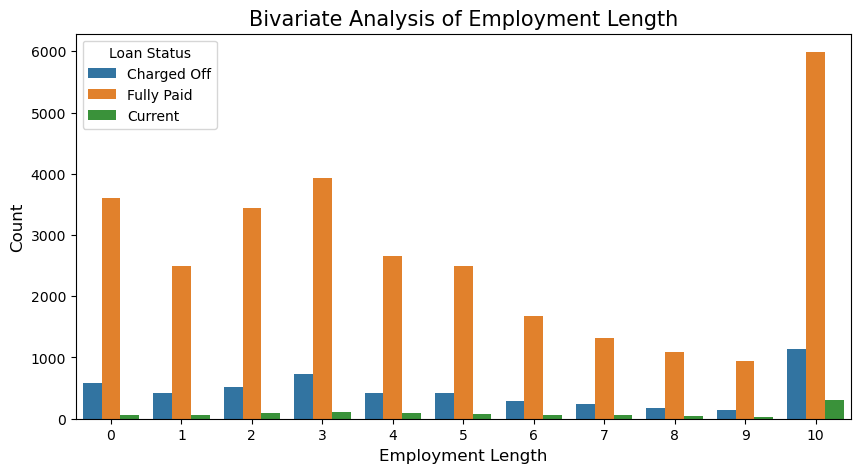

In [202]:
# Get plot the count plot over the different employment lengths on the X axis showing the difference between  different loan statuses
plt.figure(figsize=(10,5))
emp_length_plot =sns.countplot(data=loan, hue=loan["loan_status"], x=loan["emp_length"])
plt.title("Bivariate Analysis of Employment Length", fontsize=15)
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
emp_length_plot.legend(title="Loan Status")
plt.show()

In [187]:
#Plot the count plot over the different Annual income buckets on the X axis showing the difference between  different employment lengths
plt.figure(figsize=(10,5))
emp_length_plot =sns.countplot(data=loan, hue=loan["emp_length"], x=loan["annual_inc_bucket"])
plt.title("Bivariate Analysis of Employment Length and Annual income", fontsize=15)
plt.xlabel("Annual income", fontsize=12)
plt.ylabel("Count", fontsize=12)
emp_length_plot.legend(title="Employment Length")
plt.show()

KeyError: 'annual_inc_bucket'

<Figure size 1000x500 with 0 Axes>

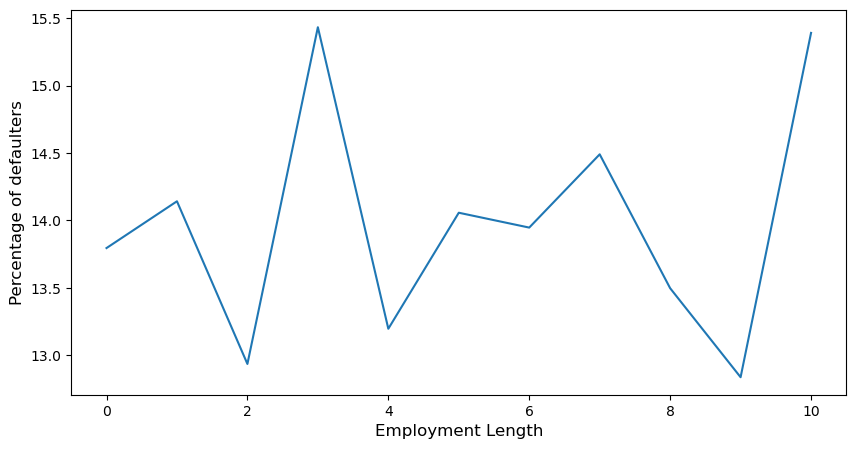

In [189]:
#We find the number of charnged off loans divided by the total number of loans grouping them by Employment length to check which employment length has the highest percentage of defaulters
emp_lengthwise_defaulter_perc = (loan[loan["loan_status"] == "Charged Off"].groupby("emp_length").size()/loan.groupby("emp_length").size())*100
plt.figure(figsize=(10,5))
sns.lineplot(data=emp_lengthwise_defaulter_perc)
plt.xlabel("Employment Length", fontsize=12)
plt.ylabel("Percentage of defaulters", fontsize=12)
plt.show()

In [ ]:
Conclusion :

In [ ]:
1.People with 3 years of work experience and 10 years of work experience tend to default more.
Moreover in the Annual income section 2.7 we see that the people with annual income 0 - 40k tend to default on their loans.
We see in the Graph of Annual income vs employment length that the People with 3 years of experience are quite a huge proportion in the 0 - 40K bracket.
This hence reinforces our analysis made in section 2.7
People with over 10 years of experience are quite high in the 60 - 80k bracket which also was observed as defaulting the second highest proportion wise.

In [ ]:
2.11. Analysis of address state and home ownership

In [ ]:
2.11.a. Univariate analysis

In [191]:
 #Plotting a bar chart on only the loans which are charged off by states

plt.figure(figsize=(20,5))
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan[loan["loan_status"]== "Charged Off"]["addr_state"].unique(), y= loan[loan["loan_status"] == "Charged Off"]["addr_state"].value_counts().values)
plt.title("Univariate Analysis of Address state", fontsize=15)
plt.xlabel("Address state", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 5087 and the vector passed to `x` has length 47.

<Figure size 2000x500 with 0 Axes>

In [193]:
 #Plotting a bar chart on only the loans which are charged off by home ownership
plt.figure(figsize=(10,5))
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan[loan["loan_status"]== "Charged Off"]["home_ownership"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["home_ownership"].value_counts().values)
plt.title("Univariate Analysis of Home Ownership", fontsize=15)
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 5087 and the vector passed to `x` has length 4.

<Figure size 1000x500 with 0 Axes>

In [ ]:
Conclusion:

In [ ]:
1.People living on rent are shown to default more on their loans.
2.People in Georgia tend to default most on the loans

In [ ]:
2.11.b. Bivariate analysis

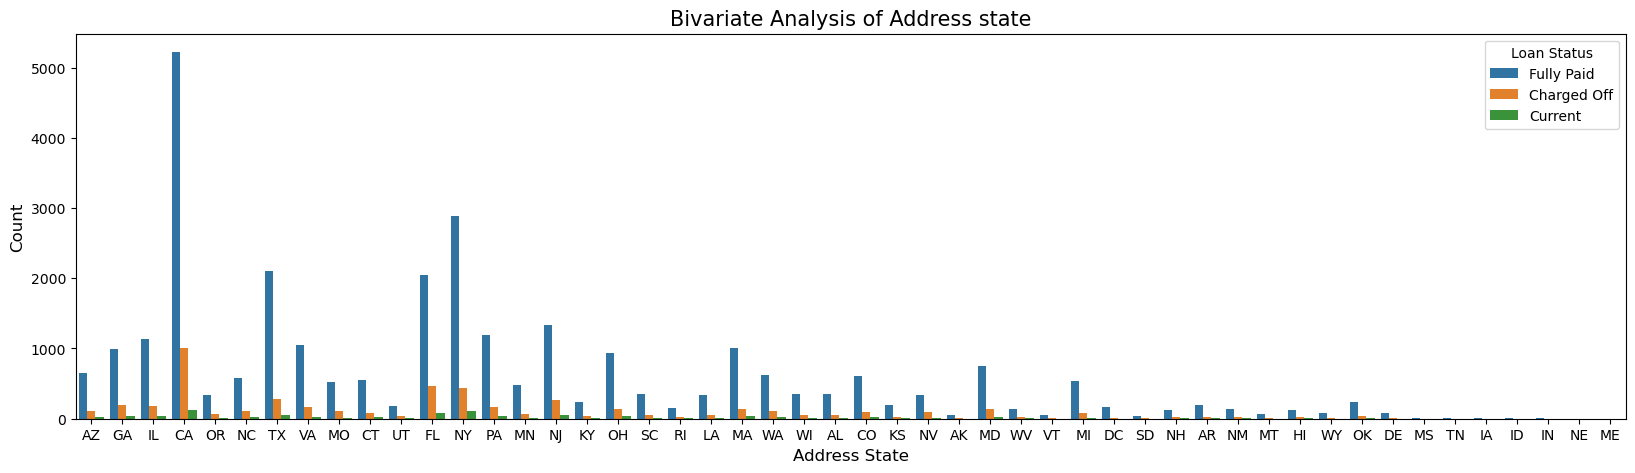

In [214]:
#Plot the count plot over the different states on the X axis showing the difference between different loan statuses
plt.figure(figsize=(20,5))

addr_state_plot =sns.countplot(data=loan, hue=loan["loan_status"], x=loan["addr_state"])
plt.title("Bivariate Analysis of Address state", fontsize=15)
plt.xlabel("Address State", fontsize=12)
plt.ylabel("Count", fontsize=12)
addr_state_plot.legend(title="Loan Status")

plt.show()

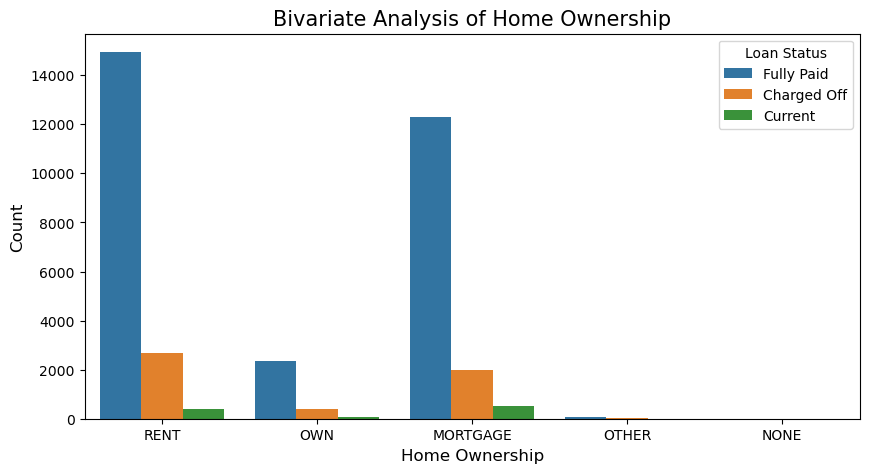

In [216]:
 #Plot the count plot over the different home ownership statuses on the X axis showing the difference between different loan statuses

plt.figure(figsize=(10,5))
home_ownership_plot =sns.countplot(data=loan, hue=loan["loan_status"], x=loan["home_ownership"])
plt.title("Bivariate Analysis of Home Ownership", fontsize=15)
plt.xlabel("Home Ownership", fontsize=12)
plt.ylabel("Count", fontsize=12)
home_ownership_plot.legend(title="Loan Status")
plt.show()

In [ ]:
2.11.c. Derived metrics analysis

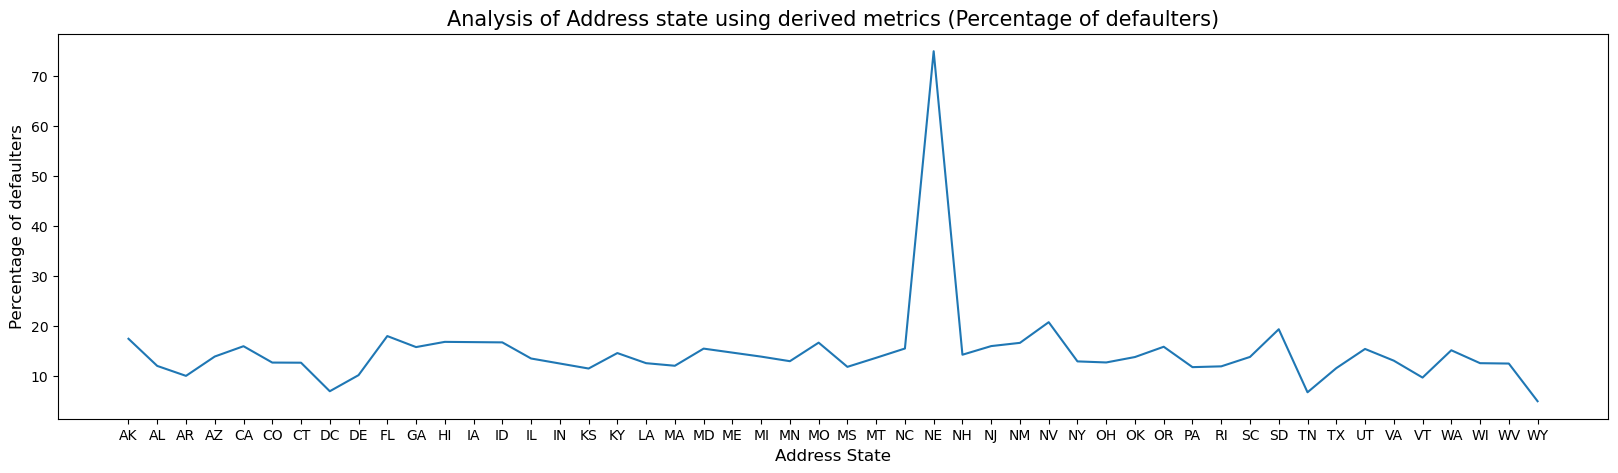

In [218]:
 #We find the number of charged off loans divided by the total number of loans grouping them by states to check which state has the highest percentage of defaulters
statewise_defaulter_perc = (loan[loan["loan_status"] == "Charged Off"].groupby("addr_state").size()/loan.groupby("addr_state").size())*100
plt.figure(figsize=(20,5))
sns.lineplot(data=statewise_defaulter_perc)
plt.title("Analysis of Address state using derived metrics (Percentage of defaulters)", fontsize=15)
plt.xlabel("Address State", fontsize=12)
plt.ylabel("Percentage of defaulters", fontsize=12)
plt.show()

In [ ]:
Conclusion:

In [ ]:
1.This shows that people in Nevada (NE) have the highest percentage of loan defaulters (Significantly higher than others), but it also is observed that Nevada
has an extremely low population of customers to make a definite conclusion. Hence the Addr state field is generally inconclusive.
2.People on Other Home ownership arrangements have a slightly higher percentage of loan defaulting, but they are extremely less in number. Then come people with mortgaged homes followed by rented accomodationers.
Probably because they have a chunk of their income to pay their mortgages or rent which does not leave them with sufficient income to pay off loans.

In [ ]:
Recommendation : Perform an income and feasibility check for people with mortgaged homes and rental accomodations.

In [ ]:
Recommendation :

In [ ]:
 Perform an income and feasibility check for people with mortgaged homes and rental accomodations.

In [ ]:
2.12. Analysis on the number of credit accounts


In [ ]:
2.12.a. Univariate analysis

In [7]:
#Plotting a bar chart on only the loans which are charged off by number of accounts
plt.figure(figsize=(10,5))

sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan[loan["loan_status"]== "Charged Off"]["open_acc"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["open_acc"].value_counts().values)
plt.title("Univariate Analysis of Open accounts", fontsize=15)
plt.xlabel("Open accounts", fontsize=12)
plt.ylabel("Count", fontsize=12)


plt.show()

NameError: name 'loan' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
Lower number of accounts show higher defaulting numbers

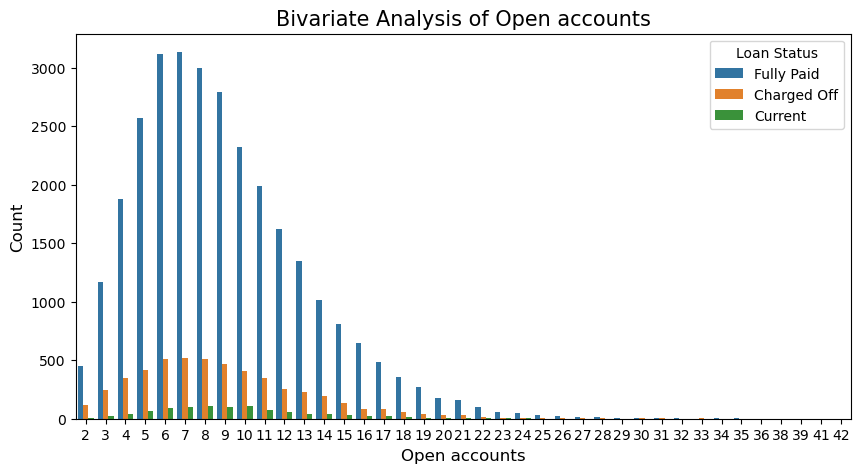

In [222]:
 #Plot the count plot over the different number of accounts on the X axis showing the difference between different loan statuses

plt.figure(figsize=(10,5))
open_acc_plot =sns.countplot(data=loan, hue=loan["loan_status"], x=loan["open_acc"])
plt.title("Bivariate Analysis of Open accounts", fontsize=15)
plt.xlabel("Open accounts", fontsize=12)
plt.ylabel("Count", fontsize=12)
open_acc_plot.legend(title="Loan Status")
plt.show()

In [ ]:
Highest number of people have 6 - 7 accounts

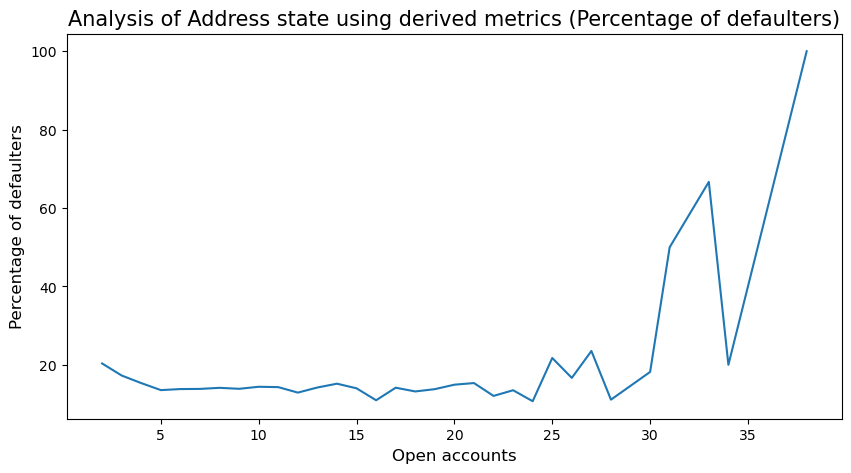

In [224]:
 #We find the number of charged off loans divided by the total number of loans grouping them by number of accounts to check which category has the highest percentage of defaulters
acc_countwise_defaulter_perc = (loan[loan["loan_status"] == "Charged Off"].groupby("open_acc").size()/loan.groupby("open_acc").size())*100
plt.figure(figsize=(10,5))
sns.lineplot(data=acc_countwise_defaulter_perc)
plt.title("Analysis of Address state using derived metrics (Percentage of defaulters)", fontsize=15)
plt.xlabel("Open accounts", fontsize=12)
plt.ylabel("Percentage of defaulters", fontsize=12)
plt.show()

In [ ]:
COnclusion : 

In [ ]:
Higher the number of accounts higher the percentage of defaulters, but there are miniscule people with so many accounts. 
Some times only 1 or 2 hence we cannot conclude that the number of accounts has any part to play

In [ ]:
2.13. Analysis of Months years and quarters


In [ ]:
2.13.a. Univariate analysis

NameError: name 'loan' is not defined

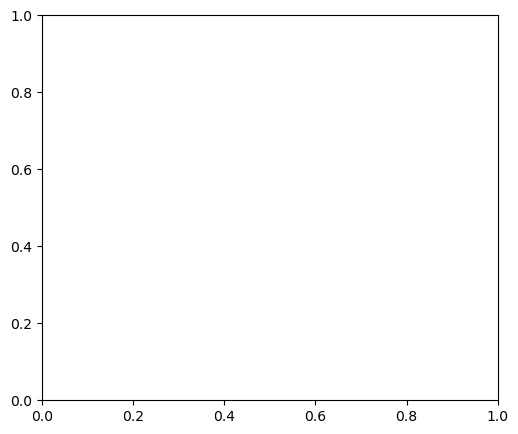

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan[loan["loan_status"]== "Charged Off"]["issue_m"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["issue_m"].value_counts().values)
plt.title("Univariate Analysis of Months", fontsize=15)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(1,3,2)
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan[loan["loan_status"]== "Charged Off"]["issue_y"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["issue_y"].value_counts().values)
plt.title("Univariate Analysis of Years", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.subplot(1,3,3)
sns.barplot(data=loan[loan["loan_status"] == "Charged Off"], x= loan[loan["loan_status"]== "Charged Off"]["issue_q"].unique(), y= loan[loan["loan_status"]== "Charged Off"]["issue_q"].value_counts().values)
plt.title("Univariate Analysis of Quarters", fontsize=15)
plt.xlabel("Quarters", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

COnclusion : 

In [ ]:
1.The year 2011 shows the highest number of defaulters.

2.Also The last months / last quarters hsows a higher number of defaulters

In [ ]:
2.13.b. Bivariate analysis

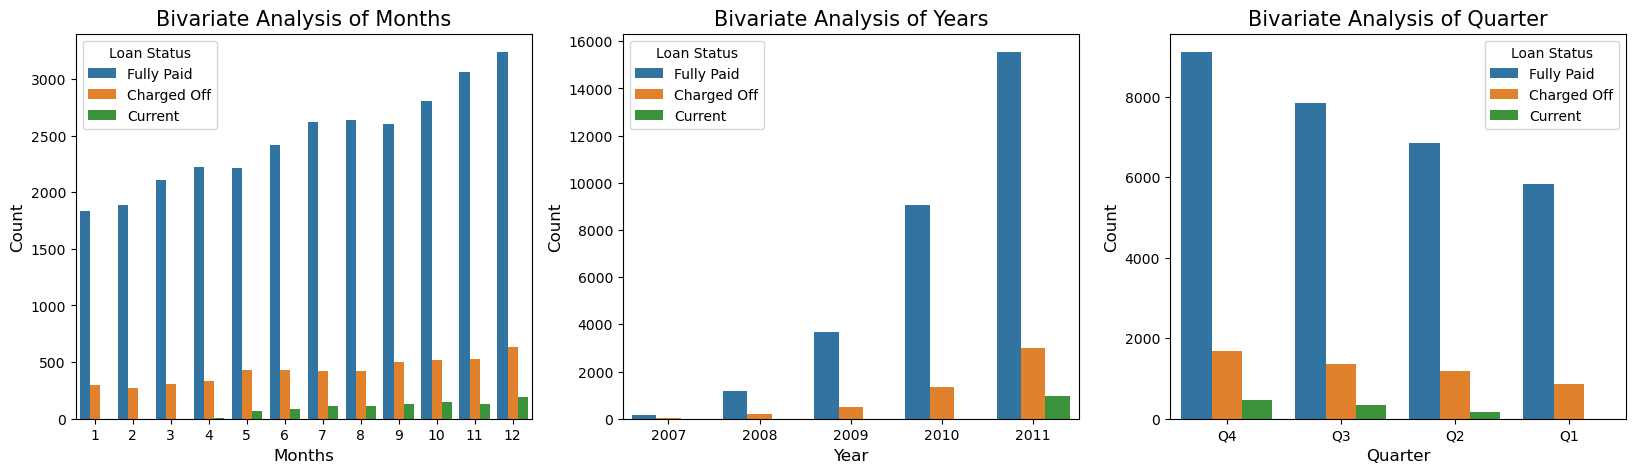

In [234]:
#Plotting sub plots of bar charts on only the loans which are charged off by the month, year and quarter
plt.figure(figsize=(20,5))

plt.subplot(1,3,1) # By the month
month_plot =sns.countplot(data=loan, hue=loan["loan_status"], x=loan["issue_m"])
plt.title("Bivariate Analysis of Months", fontsize=15)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Count", fontsize=12)
month_plot.legend(title="Loan Status")

plt.subplot(1,3,2) # By the year
year_plot =sns.countplot(data=loan, hue=loan["loan_status"], x=loan["issue_y"])
plt.title("Bivariate Analysis of Years", fontsize=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)
year_plot.legend(title="Loan Status")

plt.subplot(1,3,3) # By the quarter
year_plot =sns.countplot(data=loan, hue=loan["loan_status"], x=loan["issue_q"])
plt.title("Bivariate Analysis of Quarter", fontsize=15)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Count", fontsize=12)
year_plot.legend(title="Loan Status")

In [ ]:
2.13.c. Derived metric analysis

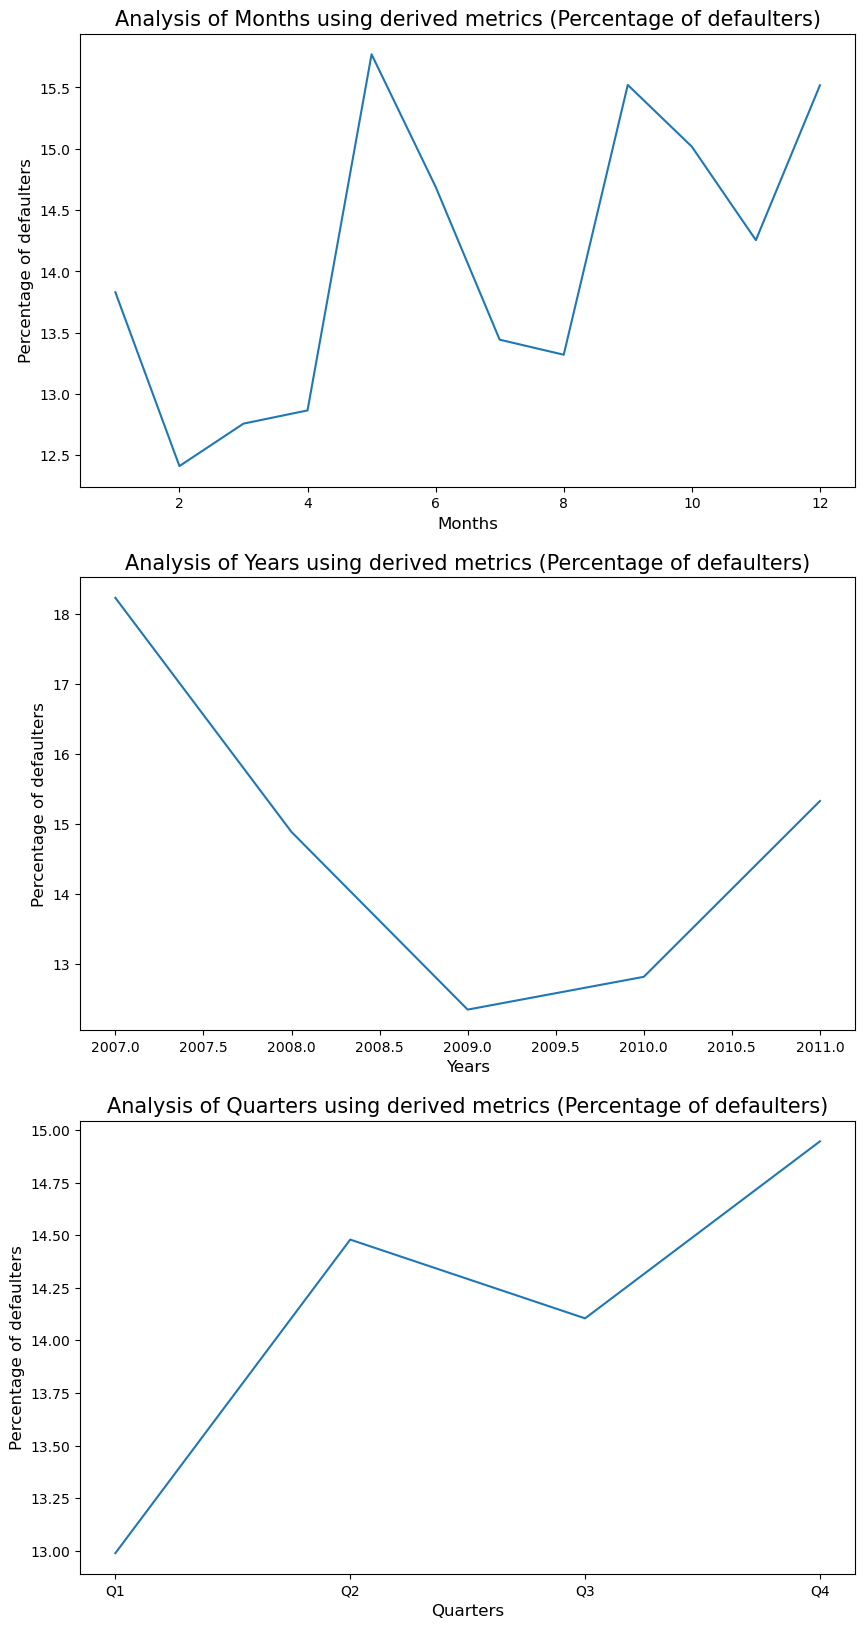

In [236]:
#We find the number of charged off loans divided by the total number of loans grouping them by 
# 1. Month
# 2. Year
# 3. Quarter t
#to check which category has the highest percentage of defaulters

plt.figure(figsize=(10,20))

plt.subplot(3,1,1)# By the month
monthwise_defaulter_perc = (loan[loan["loan_status"] == "Charged Off"].groupby("issue_m").size()/loan.groupby("issue_m").size())*100
sns.lineplot(data=monthwise_defaulter_perc)
plt.title("Analysis of Months using derived metrics (Percentage of defaulters)", fontsize=15)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Percentage of defaulters", fontsize=12)

plt.subplot(3,1,2)# By the year
yearwise_defaulter_perc = (loan[loan["loan_status"] == "Charged Off"].groupby("issue_y").size()/loan.groupby("issue_y").size())*100
sns.lineplot(data=yearwise_defaulter_perc)
plt.title("Analysis of Years using derived metrics (Percentage of defaulters)", fontsize=15)
plt.xlabel("Years", fontsize=12)
plt.ylabel("Percentage of defaulters", fontsize=12)

plt.subplot(3,1,3)# By the Quarter
quarterwise_defaulter_perc = (loan[loan["loan_status"] == "Charged Off"].groupby("issue_q").size()/loan.groupby("issue_q").size())*100
sns.lineplot(data=quarterwise_defaulter_perc)
plt.title("Analysis of Quarters using derived metrics (Percentage of defaulters)", fontsize=15)
plt.xlabel("Quarters", fontsize=12)
plt.ylabel("Percentage of defaulters", fontsize=12)
plt.show()

In [ ]:
Conclusion:


Year :

1.Initial years had a very low number of customers. It shows a higher percent of defaulters bu that cannot be considered.
2.We see that the number of customers have risen over the years exponentially
3.2009 was the year when the defaults were t its lowest. But it increased ever since with increasing customers.

Recommendation : To review loan policy changes post 2009.

Quarter :

1.We see the least number of defaults in Q1 followed by a spike in Q2 and a bigger spike in Q4 after a slight decrease in Q3.
2.COuld be the holiday season affecting this

Month :

1.Observations same as the quarters.
2.The Q2 spike is contributed majorly by May. ANalysis needed for the month of May

In [ ]:
Final conclusions


1.The DTI column has teh lowest correlation with any column
2.The DTI column has a negative correlation with Annual income
3.Total amount, loan amount, installment and total payment, have very strong correlations with each other. Due to the strong correlation between these variables we can analyse just the Loan amount.
4.Month and year issued do not have any correlation with any variable, but it is not expected to have correlation as it is a measure of time. Any correlation which happens would be by chance.
5.Inquiries column also does not have any strong correlation with any other variable.
6.The proportion of 60 month loans getting defaulted is higher.
7.Proportion wise loans with grade D gets charged off the most.
8.Proportion wise loans with grade D3 and D4 which get charged off the most.
9.Higher the interest rate higher is the chance to default.
10.We see higher chances of defaulting in the 0 - 40k bracket, closely followed by 60 - 80k bracket.
11.Higher loan amounts are charged off more. Hence proper vetting and background checks are necessary for higher loans.
12.We see upon checking the percentage of defaulters that small business loans are more likely to default, followed by renewable energy projects.
13.People with 3 years of work experience and 10 years of work experience tend to default more.
14.People on Other Home ownership arrangements have a slightly higher percentage of loan defaulting, but they are extremely less in number. Then come people with mortgaged homes followed by rented accomodationers. Probably because they have a chunk of their income to pay their mortgages or rent which does not leave them with sufficient income to pay off loans.
15.Year :
16.Quarter :
We see the least number of defaults in Q1 followed by a spike in Q2 and a bigger spike in Q4 after a slight decrease in Q3. COuld be the holiday season affecting this


Initial years had a very low number of customers. It shows a higher percent of defaulters bu that cannot be considered. We see that the number of customers have risen over the years exponentially 2009 was the year when the defaults were t its lowest. But it increased ever since with increasing customers.


17.Month :
Observations same as the quarters. The Q2 spike is contributed majorly by May. Analysis needed for the month of May


Recommendations :

# Make the income verification process more stringent.
Hence proper vetting and background checks are necessary for higher loans.
Stringent checks on business feasibility must be performed. Detailed RoI analysis should be perfomed.
Perform an income and feasibility check for people with mortgaged homes and rental accomodations.
To review loan policy changes post 2009.